## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  48.802097   726.543275  0.916785  5.922826  1.493912
1   2.877979   973.240954  0.673187  7.383685  1.551855
2   3.071942  1423.982669  0.681903  1.237424  1.374995
3  77.480380  1063.343721  0.890160  2.581569  1.374841
4  63.475687  1471.335028  0.069541  4.914121  1.065476


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0493081	total: 67.9ms	remaining: 1m 7s
1:	learn: 1.0400076	total: 68.5ms	remaining: 34.2s
2:	learn: 1.0305497	total: 69.1ms	remaining: 22.9s
3:	learn: 1.0222334	total: 69.7ms	remaining: 17.3s
4:	learn: 1.0119123	total: 70.2ms	remaining: 14s
5:	learn: 1.0015968	total: 70.9ms	remaining: 11.7s
6:	learn: 0.9904653	total: 71.4ms	remaining: 10.1s
7:	learn: 0.9801461	total: 71.9ms	remaining: 8.91s
8:	learn: 0.9709698	total: 72.4ms	remaining: 7.97s
9:	learn: 0.9635515	total: 72.9ms	remaining: 7.22s
10:	learn: 0.9547318	total: 73.3ms	remaining: 6.59s
11:	learn: 0.9459329	total: 73.8ms	remaining: 6.07s
12:	learn: 0.9369188	total: 74.3ms	remaining: 5.64s
13:	learn: 0.9293864	total: 74.8ms	remaining: 5.27s
14:	learn: 0.9203192	total: 75.1ms	remaining: 4.93s
15:	learn: 0.9107160	total: 75.6ms	remaining: 4.65s
16:	learn: 0.9008873	total: 76ms	remaining: 4.39s
17:	learn: 0.8922060	total: 76.6ms	remaining: 4.18s
18:	learn: 0.8849847	total: 77ms	remaining: 3.98

94:	learn: 0.4632639	total: 109ms	remaining: 1.04s
95:	learn: 0.4592892	total: 109ms	remaining: 1.03s
96:	learn: 0.4564810	total: 110ms	remaining: 1.02s
97:	learn: 0.4533658	total: 110ms	remaining: 1.01s
98:	learn: 0.4487399	total: 111ms	remaining: 1.01s
99:	learn: 0.4453559	total: 111ms	remaining: 999ms
100:	learn: 0.4420953	total: 111ms	remaining: 992ms
101:	learn: 0.4390186	total: 112ms	remaining: 984ms
102:	learn: 0.4358400	total: 112ms	remaining: 977ms
103:	learn: 0.4327639	total: 113ms	remaining: 970ms
104:	learn: 0.4302286	total: 113ms	remaining: 964ms
105:	learn: 0.4275911	total: 113ms	remaining: 956ms
106:	learn: 0.4240799	total: 114ms	remaining: 950ms
107:	learn: 0.4205857	total: 114ms	remaining: 944ms
108:	learn: 0.4172876	total: 115ms	remaining: 938ms
109:	learn: 0.4140987	total: 115ms	remaining: 931ms
110:	learn: 0.4112804	total: 115ms	remaining: 924ms
111:	learn: 0.4083479	total: 116ms	remaining: 917ms
112:	learn: 0.4052213	total: 116ms	remaining: 912ms
113:	learn: 0.4024

271:	learn: 0.1747466	total: 186ms	remaining: 499ms
272:	learn: 0.1741991	total: 187ms	remaining: 498ms
273:	learn: 0.1734076	total: 187ms	remaining: 496ms
274:	learn: 0.1729030	total: 188ms	remaining: 495ms
275:	learn: 0.1724528	total: 188ms	remaining: 493ms
276:	learn: 0.1718775	total: 188ms	remaining: 492ms
277:	learn: 0.1708828	total: 189ms	remaining: 490ms
278:	learn: 0.1697886	total: 189ms	remaining: 489ms
279:	learn: 0.1693131	total: 190ms	remaining: 487ms
280:	learn: 0.1688380	total: 190ms	remaining: 486ms
281:	learn: 0.1679846	total: 190ms	remaining: 485ms
282:	learn: 0.1673705	total: 191ms	remaining: 483ms
283:	learn: 0.1665430	total: 191ms	remaining: 482ms
284:	learn: 0.1659994	total: 191ms	remaining: 480ms
285:	learn: 0.1651808	total: 192ms	remaining: 479ms
286:	learn: 0.1646513	total: 192ms	remaining: 477ms
287:	learn: 0.1638076	total: 193ms	remaining: 476ms
288:	learn: 0.1627517	total: 193ms	remaining: 475ms
289:	learn: 0.1618922	total: 193ms	remaining: 473ms
290:	learn: 

517:	learn: 0.0740164	total: 291ms	remaining: 271ms
518:	learn: 0.0738326	total: 292ms	remaining: 270ms
519:	learn: 0.0737583	total: 292ms	remaining: 270ms
520:	learn: 0.0736107	total: 293ms	remaining: 269ms
521:	learn: 0.0735374	total: 293ms	remaining: 268ms
522:	learn: 0.0733859	total: 293ms	remaining: 268ms
523:	learn: 0.0732400	total: 294ms	remaining: 267ms
524:	learn: 0.0729012	total: 294ms	remaining: 266ms
525:	learn: 0.0728297	total: 295ms	remaining: 266ms
526:	learn: 0.0725505	total: 295ms	remaining: 265ms
527:	learn: 0.0722589	total: 296ms	remaining: 264ms
528:	learn: 0.0721158	total: 296ms	remaining: 264ms
529:	learn: 0.0719411	total: 296ms	remaining: 263ms
530:	learn: 0.0717432	total: 297ms	remaining: 262ms
531:	learn: 0.0716033	total: 297ms	remaining: 261ms
532:	learn: 0.0714328	total: 298ms	remaining: 261ms
533:	learn: 0.0712729	total: 298ms	remaining: 260ms
534:	learn: 0.0711064	total: 298ms	remaining: 259ms
535:	learn: 0.0710372	total: 299ms	remaining: 259ms
536:	learn: 

699:	learn: 0.0514036	total: 369ms	remaining: 158ms
700:	learn: 0.0513258	total: 369ms	remaining: 158ms
701:	learn: 0.0511700	total: 370ms	remaining: 157ms
702:	learn: 0.0511530	total: 370ms	remaining: 156ms
703:	learn: 0.0509166	total: 371ms	remaining: 156ms
704:	learn: 0.0507939	total: 371ms	remaining: 155ms
705:	learn: 0.0507067	total: 371ms	remaining: 155ms
706:	learn: 0.0506308	total: 372ms	remaining: 154ms
707:	learn: 0.0504806	total: 372ms	remaining: 154ms
708:	learn: 0.0504642	total: 373ms	remaining: 153ms
709:	learn: 0.0504023	total: 373ms	remaining: 152ms
710:	learn: 0.0503030	total: 374ms	remaining: 152ms
711:	learn: 0.0501840	total: 374ms	remaining: 151ms
712:	learn: 0.0500674	total: 375ms	remaining: 151ms
713:	learn: 0.0498395	total: 375ms	remaining: 150ms
714:	learn: 0.0496160	total: 376ms	remaining: 150ms
715:	learn: 0.0495324	total: 376ms	remaining: 149ms
716:	learn: 0.0494503	total: 377ms	remaining: 149ms
717:	learn: 0.0493066	total: 377ms	remaining: 148ms
718:	learn: 

944:	learn: 0.0312849	total: 473ms	remaining: 27.5ms
945:	learn: 0.0312132	total: 474ms	remaining: 27.1ms
946:	learn: 0.0311561	total: 474ms	remaining: 26.5ms
947:	learn: 0.0311056	total: 475ms	remaining: 26ms
948:	learn: 0.0309436	total: 475ms	remaining: 25.5ms
949:	learn: 0.0308940	total: 475ms	remaining: 25ms
950:	learn: 0.0308339	total: 476ms	remaining: 24.5ms
951:	learn: 0.0307718	total: 476ms	remaining: 24ms
952:	learn: 0.0307358	total: 477ms	remaining: 23.5ms
953:	learn: 0.0307005	total: 477ms	remaining: 23ms
954:	learn: 0.0305686	total: 478ms	remaining: 22.5ms
955:	learn: 0.0305189	total: 478ms	remaining: 22ms
956:	learn: 0.0304698	total: 479ms	remaining: 21.5ms
957:	learn: 0.0303994	total: 479ms	remaining: 21ms
958:	learn: 0.0303511	total: 479ms	remaining: 20.5ms
959:	learn: 0.0302904	total: 480ms	remaining: 20ms
960:	learn: 0.0302426	total: 480ms	remaining: 19.5ms
961:	learn: 0.0302076	total: 481ms	remaining: 19ms
962:	learn: 0.0301732	total: 481ms	remaining: 18.5ms
963:	lear

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

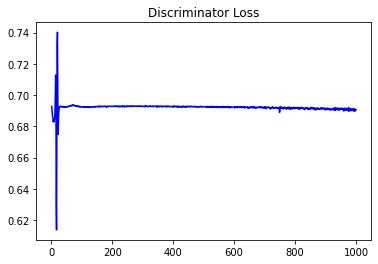

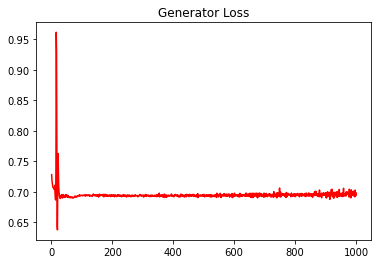

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12083576273191098


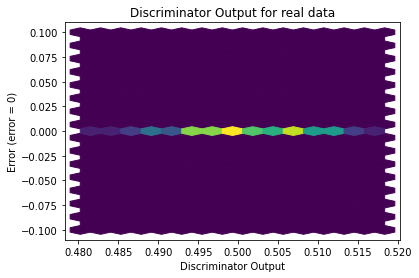

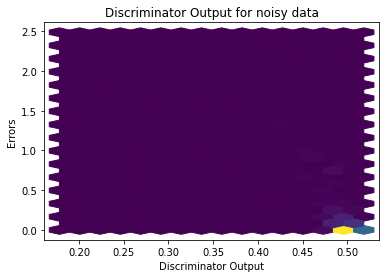

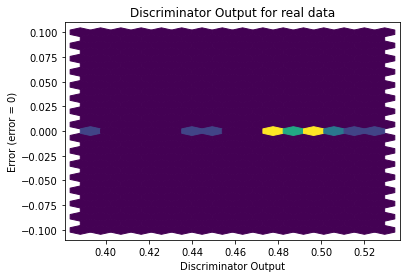

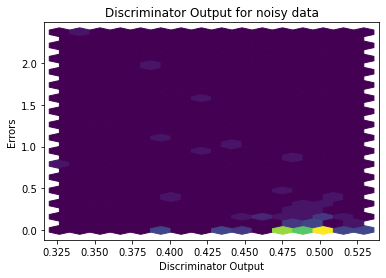

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


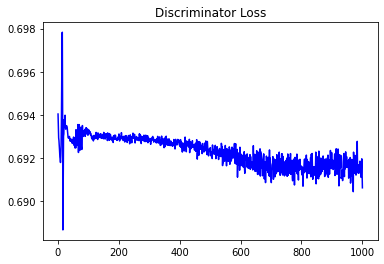

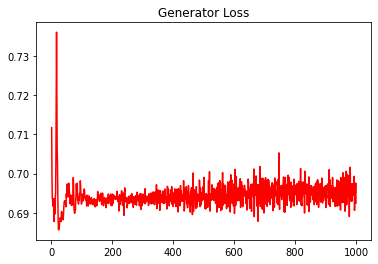

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.12253709189663259


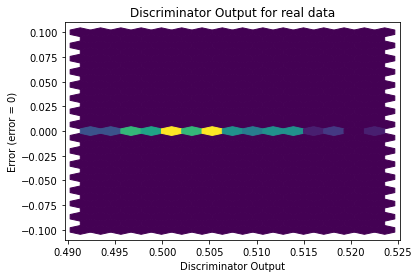

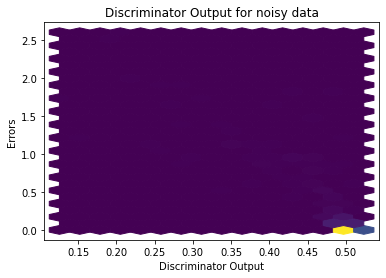

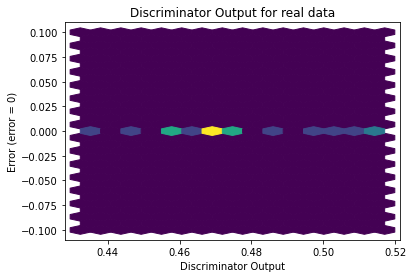

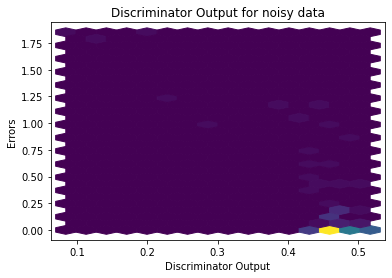

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3915]], requires_grad=True)
